In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/one_hot_encoded_dataset (1).csv')

In [ ]:
df.head()

,Unnamed: 0,url,type,benign,defacement,malware,phishing
0,0,br-icloud.com.br,phishing,0,0,0,1
1,1,mp3raid.com/music/krizz_kaliko.html,benign,1,0,0,0
2,2,bopsecrets.org/rexroth/cr/1.htm,benign,1,0,0,0
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,0
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,0


In [ ]:
df.shape

(90648, 7)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
url           0
type          1
benign        0
defacement    0
malware       0
phishing      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
url           0
type          0
benign        0
defacement    0
malware       0
phishing      0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'url', 'type', 'benign', 'defacement', 'malware',
       'phishing'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:

df.head()

,url,type,benign,defacement,malware,phishing
0,br-icloud.com.br,phishing,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,0


In [ ]:
labels=['benign','defacement','malware','phishing']

In [ ]:
print(labels)

['phishing', 'benign', 'defacement', 'malware']


In [ ]:
df.drop('type',inplace=True,axis=1)

In [ ]:
df.head()

,url,benign,defacement,malware,phishing
0,br-icloud.com.br,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train_url,test_url,train_target,test_target=train_test_split(df['url'].to_numpy(),
                                                             df[['benign','defacement','malware','phishing']].to_numpy(),
                                                             test_size=0.2,
                                                             stratify=df[['benign','defacement','malware','phishing']])

In [ ]:


 len(train_url),len(test_url)

(72517, 18130)

In [ ]:
train_url,valid_url,train_target,valid_target=train_test_split(train_url,
                                                             train_target,
                                                             test_size=0.2,
                                                             )

In [ ]:

len(train_url),len(valid_url)

(58013, 14504)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
def custom_standardization1(input_data):
  return tf.strings.regex_replace(input_data, '/', ' ')

In [ ]:
text_vec = TextVectorization(max_tokens= 10000 , output_mode= 'int' , output_sequence_length= 55 ,  standardize=custom_standardization1)


In [ ]:
text_vec.adapt(train_url)

In [ ]:
text_vec([train_url[2]])

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[4569,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
text_vec.get_vocabulary()

['',
 '[UNK]',
 'http:',
 'wiki',
 'en.wikipedia.org',
 'index.php',
 '2011',
 'youtube.com',
 'news',
 'facebook.com',
 'en',
 'component',
 'index.html',
 'people',
 'amazon.com',
 'dp',
 '2010',
 '10',
 '05',
 '2015',
 '9779.info',
 'article',
 'pages',
 'linkedin.com',
 'directory',
 'name',
 'imdb.com',
 'topic',
 'pub',
 'view',
 'myspace.com',
 'c',
 'topics',
 '11',
 'mylife.com',
 '2009',
 'articles',
 'blog',
 'sports',
 'category',
 '04',
 'torrent',
 '09',
 '08',
 '07',
 'https:',
 'manta.com',
 '03',
 's',
 '01',
 '1',
 'tag',
 '06',
 '02',
 'content',
 'absoluteastronomy.com',
 'music',
 'story',
 'artist',
 'id',
 'wn.com',
 'video',
 '12',
 'mailto',
 'players',
 'twitter.com',
 'torcache.net',
 'question',
 'answers.com',
 'wp-content',
 '0',
 'in',
 'pipl.com',
 '2008',
 'a',
 'item',
 'p',
 'images',
 'detail',
 'videos',
 'post',
 'css',
 'photos',
 'dir',
 'info',
 'people.famouswhy.com',
 'cgi-bin',
 'us',
 'login',
 'album',
 'search',
 '13',
 '_',
 'obituaries',

In [ ]:
train_url

array(['lexusoforlando.com/',
       'amazon.com/WWF-WrestleMania-2000-Al-Snow/dp/6305994781',
       'whosaliveandwhosdead.com/l_pmom.asp?sort=dod', ...,
       'youtube.com/user/flyscooters',
       'http://www.alexanderstiftung.de/index.php?option=com_content&view=article&id=35:2-preis-laudatio-auf-erik-westermann&catid=24&Itemid=7',
       'http://www.nubiafarias.com/v1/index.php?option=com_lkyoutube&view=lkyoutube&Itemid=17&url=cQoZqdf83Lc'],
      dtype=object)

In [ ]:
len(train_url)

58013

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
embedding=Embedding(input_dim=10000,output_dim=128)

In [ ]:
print(embedding(text_vec([train_url[8]])))

tf.Tensor(
[[[ 0.03737267  0.04389301  0.02249484 ... -0.03657369 -0.01186339
   -0.00956021]
  [-0.04809887  0.01556769  0.01669321 ...  0.00699753 -0.03161261
   -0.01988759]
  [ 0.01016863 -0.03668252 -0.01216495 ... -0.01002752 -0.01624122
    0.01811973]
  ...
  [ 0.00436889 -0.02752024 -0.00319791 ...  0.02418575 -0.02928822
   -0.03117986]
  [ 0.00436889 -0.02752024 -0.00319791 ...  0.02418575 -0.02928822
   -0.03117986]
  [ 0.00436889 -0.02752024 -0.00319791 ...  0.02418575 -0.02928822
   -0.03117986]]], shape=(1, 55, 128), dtype=float32)


In [ ]:
embedding(text_vec([train_url[8]])).shape

TensorShape([1, 55, 128])

In [ ]:
import tensorflow_hub as hub

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
def make_confusion_matrix(y_true,y_pred,classes, figsize=(12,12),text_size=22):
  #creating confusion matrix
  cm=confusion_matrix(y_true,tf.round(y_pred))
  print(cm)
  print('\n')
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]#normalize our confusion matrix
  n_classes=cm.shape[0]
  #Lets prettify it
  fig,ax=plt.subplots(figsize=figsize)
  #create a matrix plot
  cax=ax.matshow(cm_norm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  
  if classes :
    labels=classes
  else:
    labels=np.arange(cm.shape[0])
  #Label the axes 
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  #Set x axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  #Set threshold for different colours
  threshold=(cm.max()+cm.min())//2
  #PLot the text on each text
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black',
            size=15)

In [ ]:
def plot_loss_curves(history):

  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  plt.figure(figsize=(8,8))
  epochs=range(len(history.history['loss'])) 
  #Plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()
   #Plot the accuracy curves
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.legend()

##MODEL 1 (Using USE model)

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(mode='min',monitor='val_loss',patience=7,verbose=1)

In [ ]:
encoder=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                       input_shape=[],
                       trainable=False,
                       dtype=tf.string)

In [ ]:
model_1=tf.keras.models.Sequential([
    encoder,
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1.history=model_1.fit(train_url,train_target,validation_data=(valid_url,valid_target),epochs=30,callbacks=[callback])

Epoch 1/30
1813/1813 [==============================] - 26s 13ms/step - loss: 0.3542 - accuracy: 0.7333 - val_loss: 0.3536 - val_accuracy: 0.7305
Epoch 2/30
1813/1813 [==============================] - 29s 16ms/step - loss: 0.3480 - accuracy: 0.7340 - val_loss: 0.3496 - val_accuracy: 0.7313
Epoch 3/30
1813/1813 [==============================] - 22s 12ms/step - loss: 0.3443 - accuracy: 0.7359 - val_loss: 0.3489 - val_accuracy: 0.7325
Epoch 4/30
1813/1813 [==============================] - 24s 13ms/step - loss: 0.3390 - accuracy: 0.7387 - val_loss: 0.3478 - val_accuracy: 0.7339
Epoch 5/30
1813/1813 [==============================] - 23s 13ms/step - loss: 0.3342 - accuracy: 0.7405 - val_loss: 0.3468 - val_accuracy: 0.7353
Epoch 6/30
1813/1813 [==============================] - 24s 13ms/step - loss: 0.3287 - accuracy: 0.7426 - val_loss: 0.3482 - val_accuracy: 0.7356
Epoch 7/30
1813/1813 [==============================] - 23s 12ms/step - loss: 0.3232 - accuracy: 0.7443 - val_loss: 0.3513 -

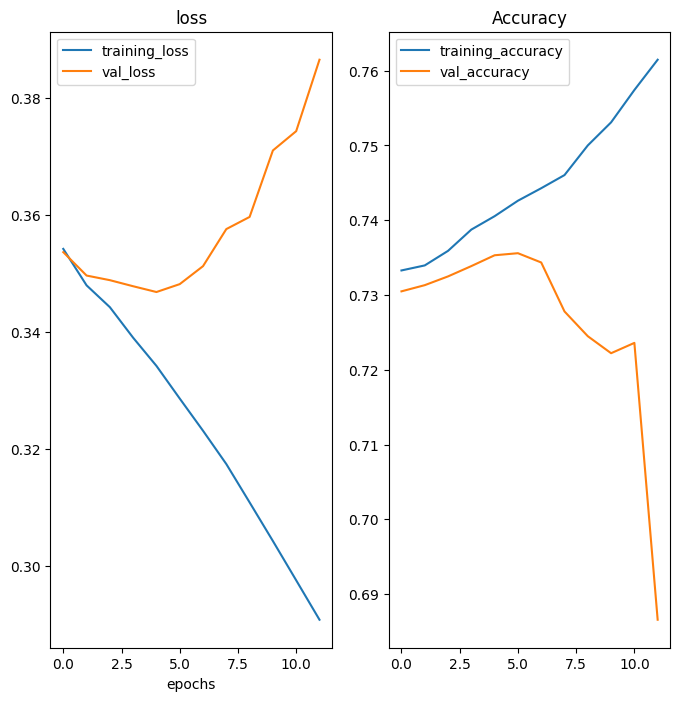

In [ ]:
plot_loss_curves(model_1.history)

In [ ]:
test_pred = model_1.predict(test_url)

567/567 [==============================] - 5s 8ms/step


In [ ]:
test_target[:5]

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
test_pred[:5]

array([[7.0754933e-01, 7.7835396e-02, 1.8973380e-01, 2.4881432e-02],
       [8.8712960e-01, 8.8787146e-02, 3.8500528e-03, 2.0233266e-02],
       [9.8985833e-01, 8.6743115e-03, 1.0389669e-05, 1.4569407e-03],
       [9.5534301e-01, 3.6983263e-02, 9.0452342e-04, 6.7691966e-03],
       [8.4653473e-01, 1.0946766e-01, 5.6109303e-03, 3.8386744e-02]],
      dtype=float32)

In [ ]:
test_pred[:5]

array([[7.0754933e-01, 7.7835396e-02, 1.8973380e-01, 2.4881432e-02],
       [8.8712960e-01, 8.8787146e-02, 3.8500528e-03, 2.0233266e-02],
       [9.8985833e-01, 8.6743115e-03, 1.0389669e-05, 1.4569407e-03],
       [9.5534301e-01, 3.6983263e-02, 9.0452342e-04, 6.7691966e-03],
       [8.4653473e-01, 1.0946766e-01, 5.6109303e-03, 3.8386744e-02]],
      dtype=float32)

In [ ]:
import numpy as np
pred_labels=np.argmax(test_pred,axis=1)
print(pred_labels[:5])
actual_labels=np.argmax(test_target,axis=1)
print(actual_labels[:5])

[0 0 0 0 0]
[0 1 0 0 0]


[[12141  3030   232   989]
 [ 1005   266    33    73]
 [  120    25   173    11]
 [   26     3     0     3]]




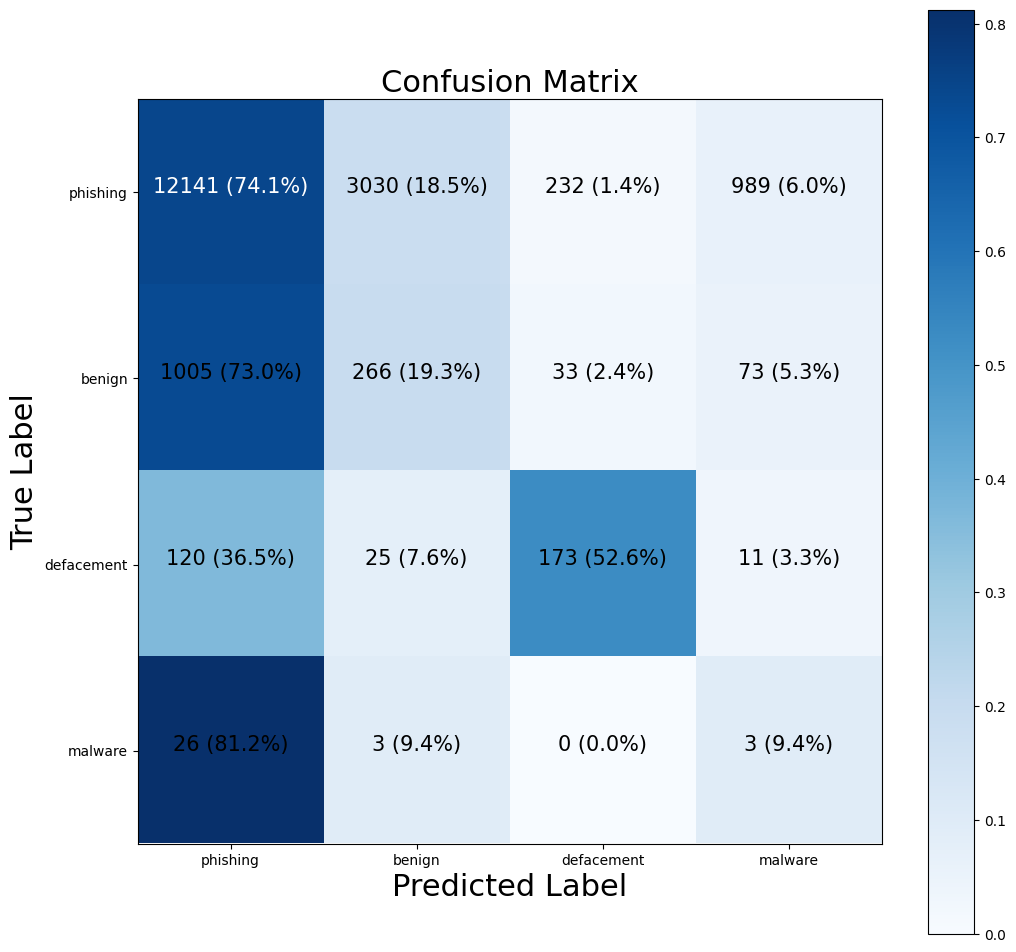

In [ ]:
make_confusion_matrix(pred_labels,actual_labels,labels)

In [ ]:
losss,accuracy=model_1.evaluate(valid_url,valid_target)

454/454 [==============================] - 9s 20ms/step - loss: 0.3865 - accuracy: 0.6866


In [ ]:
print(f"The accuracy of the model1 is: {accuracy*100:.2f}%")

The accuracy of the model1 is: 68.66%


In [ ]:
model_1.save('USE_model.h5')

In [ ]:
import matplotlib.pyplot as plt


Note:-Here we see the model has overfitted

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 4)                 260       
                                                                 
Total params: 256,872,004
Trainable params: 74,180
Non-trainable params: 256,797,824
_________________________________________________________________


#Model 2 USE model with Earlystoppings and dropout layers

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(patience=5,verbose=1,monitor='val_loss',mode='min')

In [ ]:
model_2=tf.keras.models.Sequential([
    encoder,
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_2.history=model_2.fit(train_url,train_target,validation_data=(valid_url,valid_target),epochs=30,callbacks=[callback])

Epoch 1/30
1813/1813 [==============================] - 27s 14ms/step - loss: 0.3577 - accuracy: 0.7336 - val_loss: 0.3512 - val_accuracy: 0.7305
Epoch 2/30
1813/1813 [==============================] - 35s 19ms/step - loss: 0.3512 - accuracy: 0.7338 - val_loss: 0.3509 - val_accuracy: 0.7305
Epoch 3/30
1813/1813 [==============================] - 25s 14ms/step - loss: 0.3494 - accuracy: 0.7338 - val_loss: 0.3499 - val_accuracy: 0.7305
Epoch 4/30
1813/1813 [==============================] - 23s 13ms/step - loss: 0.3483 - accuracy: 0.7341 - val_loss: 0.3497 - val_accuracy: 0.7308
Epoch 5/30
1813/1813 [==============================] - 33s 18ms/step - loss: 0.3468 - accuracy: 0.7343 - val_loss: 0.3485 - val_accuracy: 0.7312
Epoch 6/30
1813/1813 [==============================] - 38s 21ms/step - loss: 0.3453 - accuracy: 0.7350 - val_loss: 0.3470 - val_accuracy: 0.7323
Epoch 7/30
1813/1813 [==============================] - 28s 16ms/step - loss: 0.3432 - accuracy: 0.7362 - val_loss: 0.3465 -

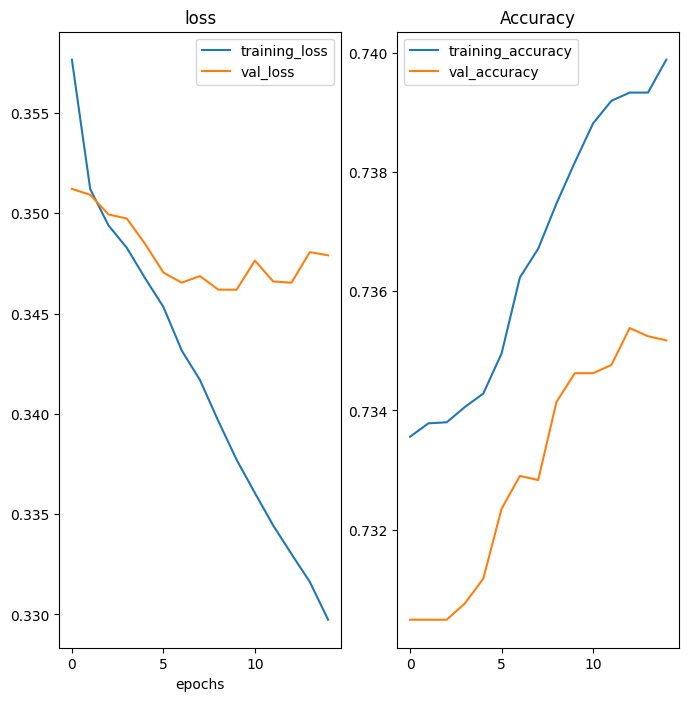

In [ ]:
plot_loss_curves(model_2.history)

##There is no much change

In [ ]:
pred_labels=np.argmax(test_pred,axis=1)
print(pred_labels[:5])
actual_labels=np.argmax(test_target,axis=1)
print(actual_labels[:5])

[0 0 0 0 0]
[0 1 0 0 0]


[[12141  3030   232   989]
 [ 1005   266    33    73]
 [  120    25   173    11]
 [   26     3     0     3]]




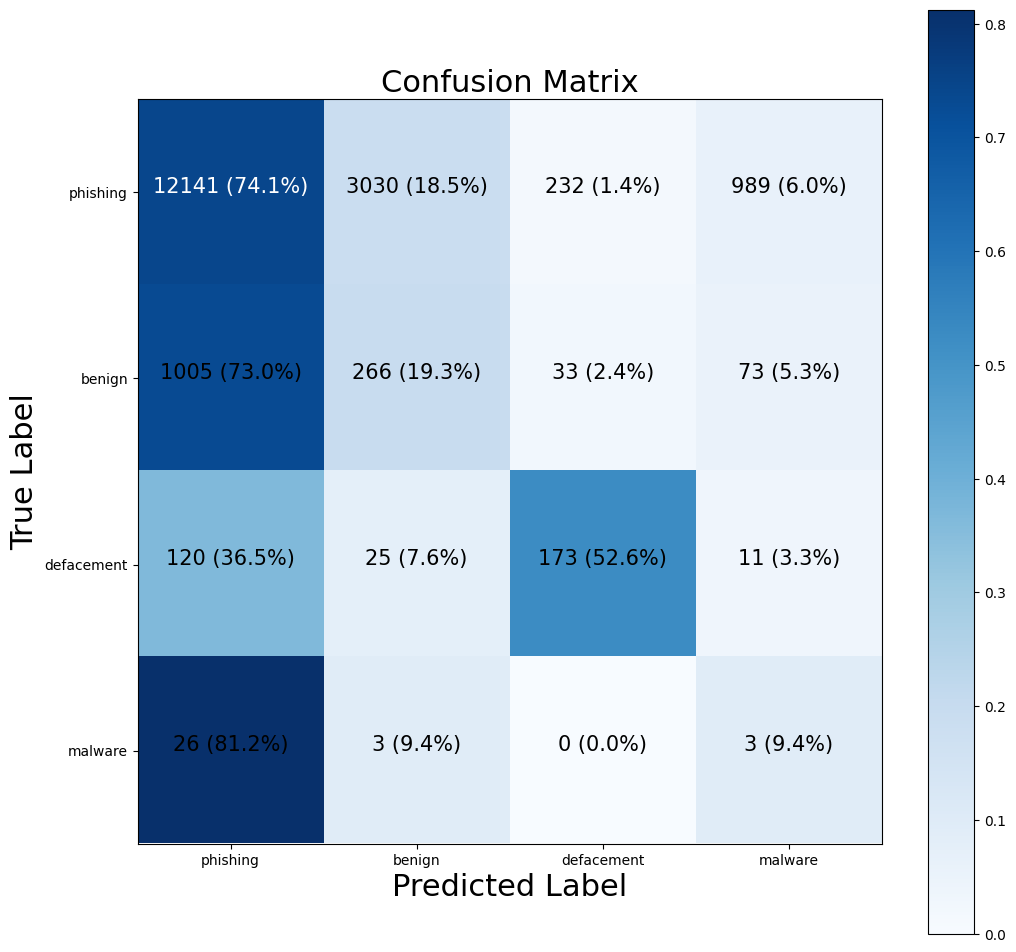

In [ ]:
make_confusion_matrix(pred_labels,actual_labels,labels)

In [ ]:
loss,accuracy=model_2.evaluate(test_url,test_target)
print(f"The accuracy of the model_2 is :{accuracy*100:.2f}%")

567/567 [==============================] - 6s 10ms/step - loss: 0.3464 - accuracy: 0.7382
The accuracy of the model_2 is :73.82%


In [ ]:
model_2.save('USE model with earlystopping.h5')

#Building the model_3 with LSTM and GRU

In [ ]:
from tensorflow.keras import layers

In [ ]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vec(inputs)
x=embedding(x)
x=layers.GRU(units=64,return_sequences=True)(x)#if you want to stack recurrent layers on top of each layer you have to set return_sequences=True
x=layers.LSTM(64,return_sequences=True)(x)
x=layers.GRU(64)(x)
x=layers.Dense(64,activation='relu')(x)
output=layers.Dense(4,activation='softmax')(x)
model_3=tf.keras.models.Model(inputs,output,name="model_3_GRU")


In [ ]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_3.history=model_3.fit(train_url,train_target,validation_data=(valid_url,valid_target),epochs=30)

Epoch 1/30
1813/1813 [==============================] - 58s 28ms/step - loss: 0.2178 - accuracy: 0.8276 - val_loss: 0.0916 - val_accuracy: 0.9185
Epoch 2/30
1813/1813 [==============================] - 38s 21ms/step - loss: 0.0658 - accuracy: 0.9398 - val_loss: 0.0662 - val_accuracy: 0.9409
Epoch 3/30
1813/1813 [==============================] - 25s 14ms/step - loss: 0.0553 - accuracy: 0.9491 - val_loss: 0.0591 - val_accuracy: 0.9464
Epoch 4/30
1813/1813 [==============================] - 25s 14ms/step - loss: 0.0528 - accuracy: 0.9502 - val_loss: 0.0589 - val_accuracy: 0.9440
Epoch 5/30
1813/1813 [==============================] - 26s 14ms/step - loss: 0.0513 - accuracy: 0.9506 - val_loss: 0.0579 - val_accuracy: 0.9447
Epoch 6/30
1813/1813 [==============================] - 24s 13ms/step - loss: 0.0499 - accuracy: 0.9514 - val_loss: 0.0579 - val_accuracy: 0.9448
Epoch 7/30
1813/1813 [==============================] - 25s 14ms/step - loss: 0.0487 - accuracy: 0.9524 - val_loss: 0.0592 -

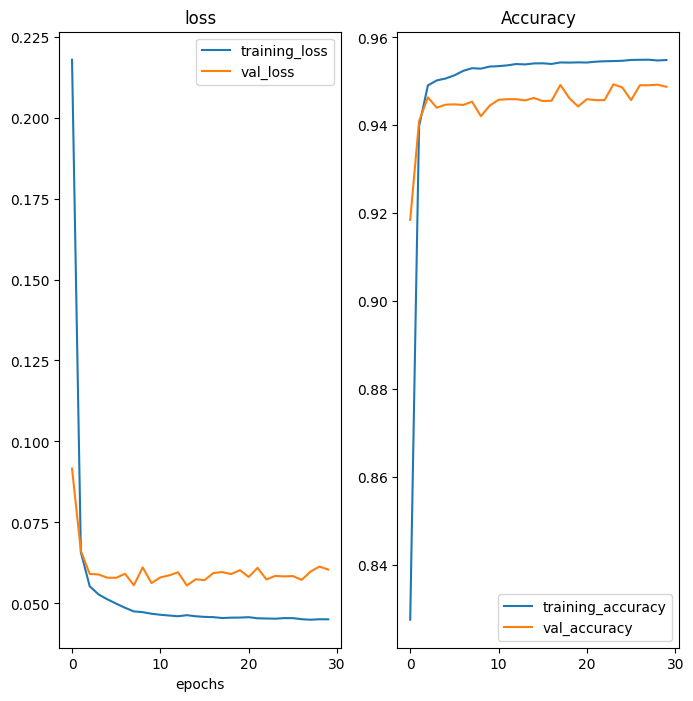

In [ ]:
plot_loss_curves(model_3.history)

In [ ]:
test_pred = model_3.predict(test_url)

567/567 [==============================] - 4s 5ms/step


In [ ]:
pred_labels=np.argmax(test_pred,axis=1)
print(pred_labels[:5])
actual_labels=np.argmax(test_target,axis=1)
print(actual_labels[:5])

[0 1 0 0 0]
[0 1 0 0 0]


[[13268     3    46   724]
 [    6  3278     5    41]
 [    5     0   359    12]
 [   13    43    28   299]]




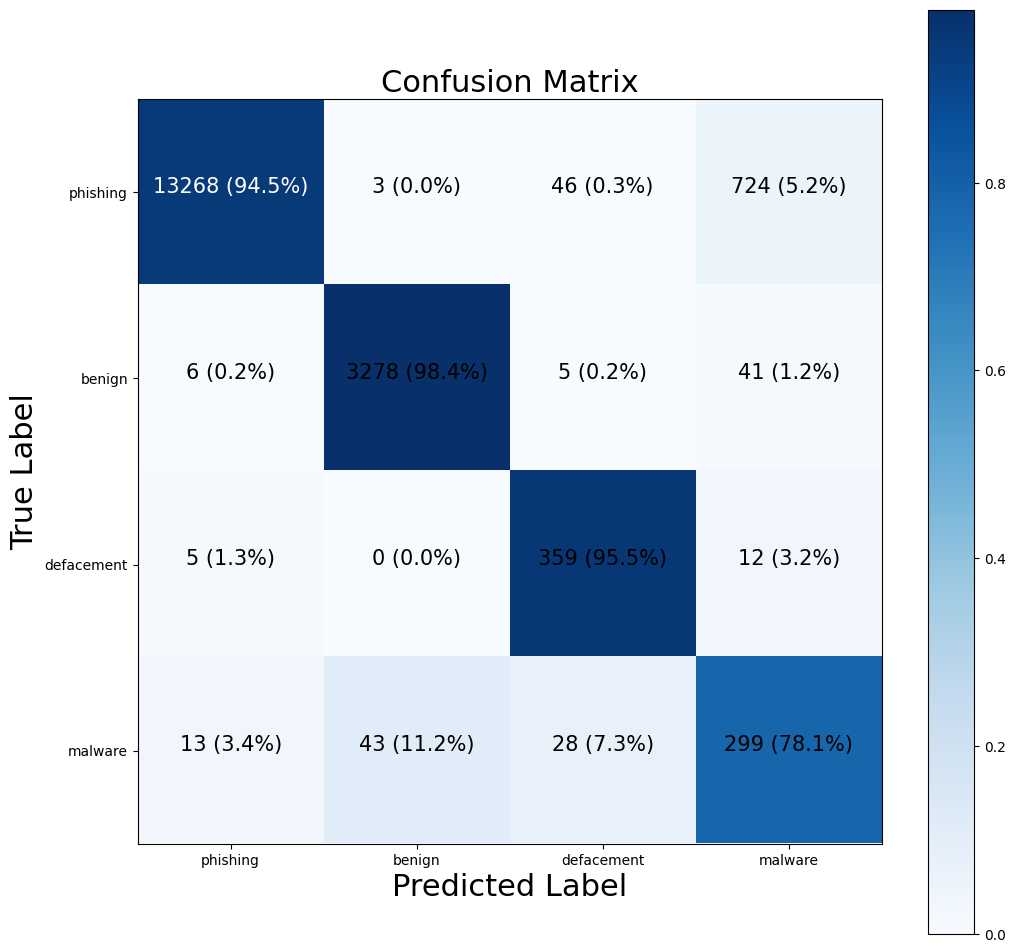

In [ ]:
make_confusion_matrix(pred_labels,actual_labels,labels)

In [ ]:
loss,accuracy=model_3.evaluate(test_url,test_target)
print(f"The accuracy of the model_3 is {accuracy*100:.2f}%")

567/567 [==============================] - 3s 6ms/step - loss: 0.0589 - accuracy: 0.9489
The accuracy of the model_3 is 94.89%


In [ ]:
model_3.save('model3.tf')

#model 4 with cnn1d

In [ ]:
inputs=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x=text_vec(inputs)
x=embedding(x)
x=tf.keras.layers.Conv1D(filters=64,kernel_size=5,activation='relu',padding='same')(x)
x=tf.keras.layers.GlobalMaxPool1D()(x)
x=tf.keras.layers.Dense(units=64,activation='relu')(x)
x=tf.keras.layers.Dense(units=32,activation='relu')(x)
outputs=tf.keras.layers.Dense(units=4,activation='softmax')(x)
model_4=tf.keras.models.Model(inputs,outputs)

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.history=model_4.fit(train_url,train_target,validation_data=(valid_url,valid_target),epochs=30)

Epoch 1/30
1813/1813 [==============================] - 33s 14ms/step - loss: 0.0619 - accuracy: 0.9466 - val_loss: 0.0595 - val_accuracy: 0.9456
Epoch 2/30
1813/1813 [==============================] - 15s 8ms/step - loss: 0.0473 - accuracy: 0.9539 - val_loss: 0.0549 - val_accuracy: 0.9462
Epoch 3/30
1813/1813 [==============================] - 20s 11ms/step - loss: 0.0466 - accuracy: 0.9544 - val_loss: 0.0558 - val_accuracy: 0.9493
Epoch 4/30
1813/1813 [==============================] - 22s 12ms/step - loss: 0.0459 - accuracy: 0.9545 - val_loss: 0.0560 - val_accuracy: 0.9493
Epoch 5/30
1813/1813 [==============================] - 12s 6ms/step - loss: 0.0458 - accuracy: 0.9546 - val_loss: 0.0556 - val_accuracy: 0.9497
Epoch 6/30
1813/1813 [==============================] - 12s 7ms/step - loss: 0.0454 - accuracy: 0.9547 - val_loss: 0.0604 - val_accuracy: 0.9482
Epoch 7/30
1813/1813 [==============================] - 12s 7ms/step - loss: 0.0455 - accuracy: 0.9548 - val_loss: 0.0570 - val

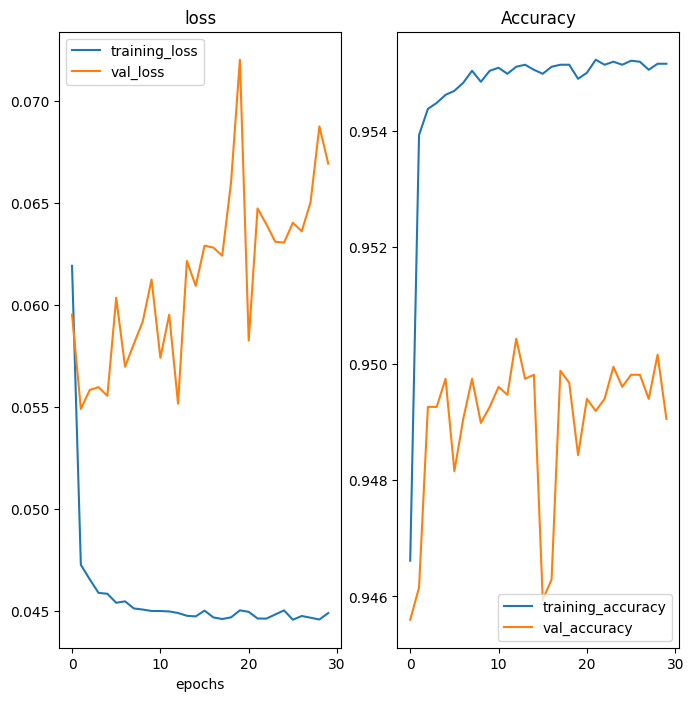

In [ ]:
plot_loss_curves(model_4.history)

In [ ]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 55)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 55, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_16 (Dense)            (None, 64)                4160  

In [ ]:
pred_labels=np.argmax(test_pred,axis=1)
print(pred_labels[:5])
actual_labels=np.argmax(test_target,axis=1)
print(actual_labels[:5])

[0 1 0 0 0]
[0 1 0 0 0]


[[13268     3    46   724]
 [    6  3278     5    41]
 [    5     0   359    12]
 [   13    43    28   299]]




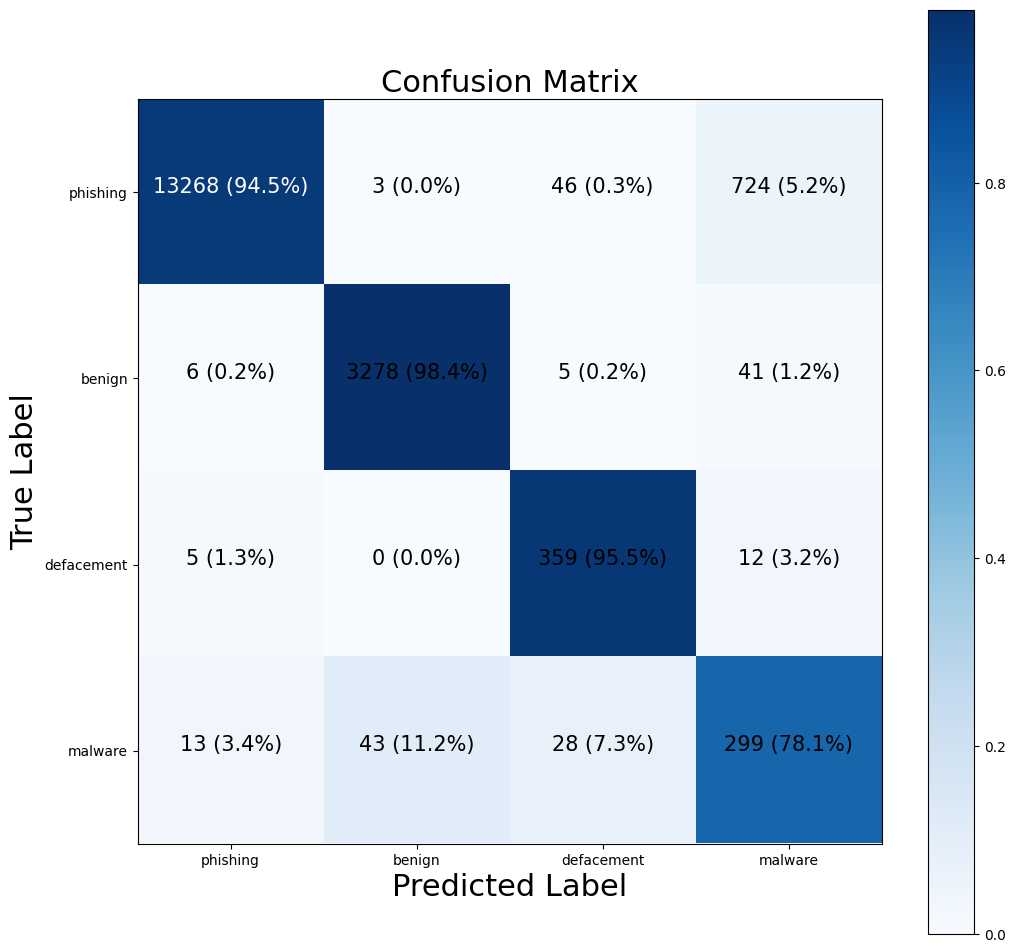

In [ ]:
make_confusion_matrix(pred_labels,actual_labels,labels)

In [ ]:
loss,accuracy=model_4.evaluate(test_url,test_target)

567/567 [==============================] - 3s 4ms/step - loss: 0.0665 - accuracy: 0.9500


In [ ]:
print(f"The accuracy of the model_4 is :{accuracy*100:.2f}%")

The accuracy of the model_4 is :95.00%


In [ ]:
model_4.save('model_4.tf')

##Model 5 

In [ ]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vec(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.GRU(64))(x)
outputs=layers.Dense(4,activation='softmax')(x)

model_5=tf.keras.models.Model(inputs,outputs)

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_5.history=model_5.fit(train_url,train_target,validation_data=(valid_url,valid_target),epochs=30,callbacks=[callback])

Epoch 1/30
1813/1813 [==============================] - 44s 20ms/step - loss: 0.0575 - accuracy: 0.9473 - val_loss: 0.0560 - val_accuracy: 0.9457
Epoch 2/30
1813/1813 [==============================] - 31s 17ms/step - loss: 0.0471 - accuracy: 0.9539 - val_loss: 0.0549 - val_accuracy: 0.9456
Epoch 3/30
1813/1813 [==============================] - 29s 16ms/step - loss: 0.0463 - accuracy: 0.9538 - val_loss: 0.0573 - val_accuracy: 0.9462
Epoch 4/30
1813/1813 [==============================] - 38s 21ms/step - loss: 0.0461 - accuracy: 0.9542 - val_loss: 0.0569 - val_accuracy: 0.9464
Epoch 5/30
1813/1813 [==============================] - 29s 16ms/step - loss: 0.0459 - accuracy: 0.9540 - val_loss: 0.0546 - val_accuracy: 0.9466
Epoch 6/30
1813/1813 [==============================] - 28s 15ms/step - loss: 0.0464 - accuracy: 0.9541 - val_loss: 0.0564 - val_accuracy: 0.9461
Epoch 7/30
1813/1813 [==============================] - 28s 15ms/step - loss: 0.0457 - accuracy: 0.9546 - val_loss: 0.0553 -

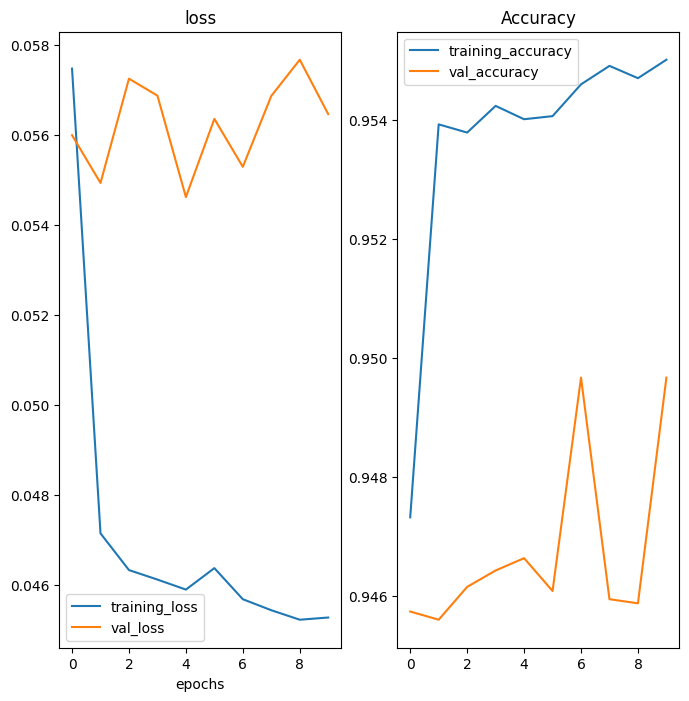

In [ ]:
plot_loss_curves(model_5.history)

In [ ]:
pred_labels=np.argmax(test_pred,axis=1)
print(pred_labels[:5])
actual_labels=np.argmax(test_target,axis=1)
print(actual_labels[:5])

[0 1 0 0 0]
[0 1 0 0 0]


[[13268     3    46   724]
 [    6  3278     5    41]
 [    5     0   359    12]
 [   13    43    28   299]]




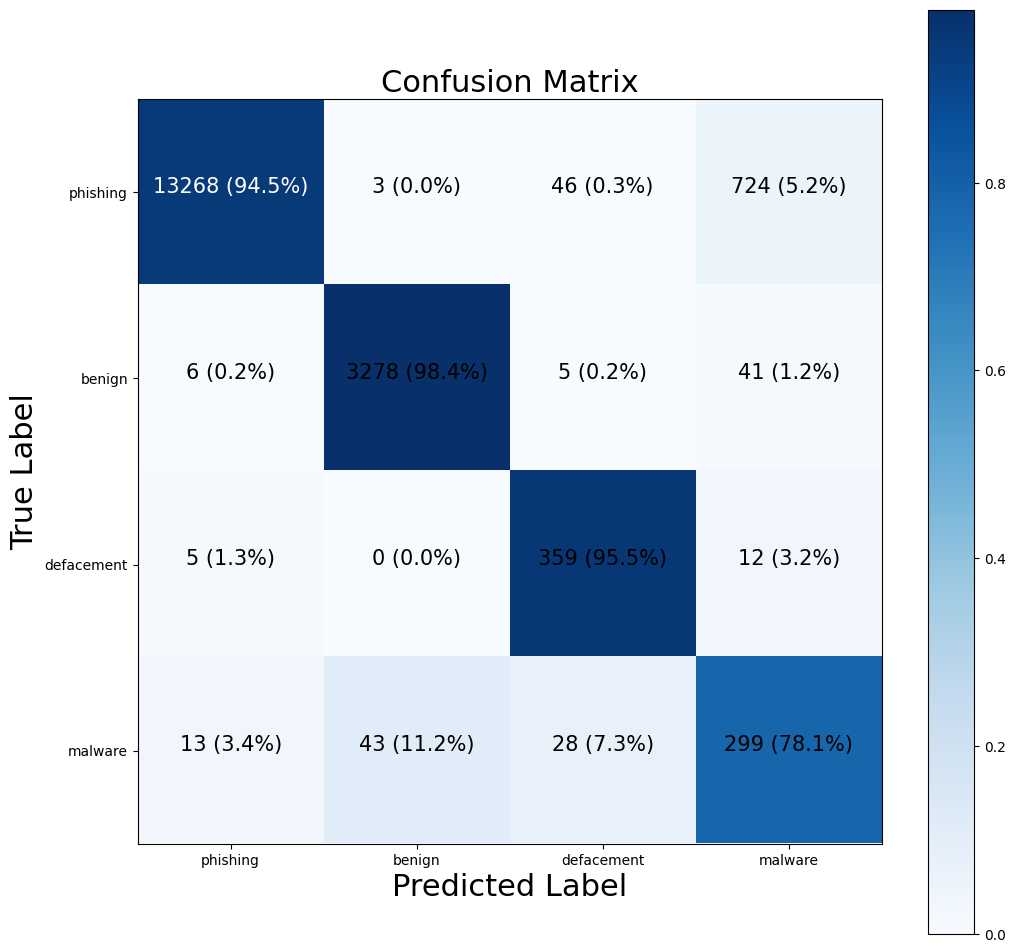

In [ ]:
make_confusion_matrix(pred_labels,actual_labels,labels)

In [ ]:
loss,accuracy=model_4.evaluate(test_url,test_target)
print(f"The accuracy of the model_4 is :{accuracy*100:.2f}%")

567/567 [==============================] - 2s 3ms/step - loss: 0.0746 - accuracy: 0.9073
The accuracy of the model_4 is :90.73%


In [ ]:
model_5.save('model_5.tf')

In [ ]:
test_url[21],labels[np.argmax(test_target[21])],labels[np.argmax(model_5.predict([test_url[21]]))]

1/1 [==============================] - 0s 68ms/step


('http://www.medicalpost.gr/index.php?option=com_content&view=article&id=158:asfixia&catid=20:2008-12-21-16-58-37&Itemid=98',
 'defacement',
 'defacement')

In [ ]:
df[df['url']==test_url[21]]

,url,benign,defacement,malware,phishing
10616,http://www.medicalpost.gr/index.php?option=com...,0,1,0,0
